In [1]:
%load_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
train_data = pd.read_csv('data/dengue_features_train.csv')
train_data['total_cases'] = pd.read_csv('data/dengue_labels_train.csv')['total_cases']
print(train_data.shape)
train_data.head()

(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

## Nulls per attribute (percentage)

In [4]:
train_data.isnull().mean() * 100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

## Noise
* While plotting the data, we realized there are a few entries in the dataset that must be immediatly remove. They report a 53rd week of the year and have all values at *NaN*
* Also, there are some week 52's on the 1st month of some years. But these don't have all values at *NaN*, so perhaps we should retain them. Changing those weeks to week 0 is perhaps the most logical solution.

In [5]:
train_data[train_data['weekofyear'] == 53]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
train_data = train_data[train_data['weekofyear'] != 53]

In [7]:
months = pd.Series([x[5:7] for x in train_data['week_start_date']])
cond = np.logical_and((train_data['weekofyear'] == 52).tolist(), (months == '01').tolist())
train_data[cond]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
191,sj,1994,52,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,...,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3,22
243,sj,1995,52,1995-01-01,0.2438,0.045000,0.215256,0.194778,71.43,298.838571,...,82.867143,71.43,17.067143,3.271429,27.314286,8.742857,32.8,22.2,9.2,154
503,sj,2000,52,2000-01-01,-0.1336,-0.061225,0.168200,0.086311,40.35,298.367143,...,76.317143,40.35,15.257143,2.642857,25.471429,6.557143,29.4,21.1,7.9,17
815,sj,2006,52,2006-01-01,-0.1062,-0.137600,0.183500,0.169767,64.08,299.147143,...,76.578571,64.08,16.027143,2.242857,25.885714,6.271429,30.0,21.1,18.6,13
1222,iq,2006,52,2006-01-01,0.3546,0.219950,0.322517,0.256333,114.58,298.181429,...,93.821429,114.58,18.584286,7.385714,27.450000,9.700000,32.7,22.4,273.5,8


In [8]:
train_data.loc[cond, 'weekofyear'] = 0
train_data[cond]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
191,sj,1994,0,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,...,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3,22
243,sj,1995,0,1995-01-01,0.2438,0.045000,0.215256,0.194778,71.43,298.838571,...,82.867143,71.43,17.067143,3.271429,27.314286,8.742857,32.8,22.2,9.2,154
503,sj,2000,0,2000-01-01,-0.1336,-0.061225,0.168200,0.086311,40.35,298.367143,...,76.317143,40.35,15.257143,2.642857,25.471429,6.557143,29.4,21.1,7.9,17
815,sj,2006,0,2006-01-01,-0.1062,-0.137600,0.183500,0.169767,64.08,299.147143,...,76.578571,64.08,16.027143,2.242857,25.885714,6.271429,30.0,21.1,18.6,13
1222,iq,2006,0,2006-01-01,0.3546,0.219950,0.322517,0.256333,114.58,298.181429,...,93.821429,114.58,18.584286,7.385714,27.450000,9.700000,32.7,22.4,273.5,8


# Attribute by attribute analysis
### Time & City
* The time interval is very big. Older instances might be a problem for predictor models to train on.

In [9]:
min(train_data['week_start_date']), max(train_data['week_start_date'])

('1990-04-30', '2010-06-25')

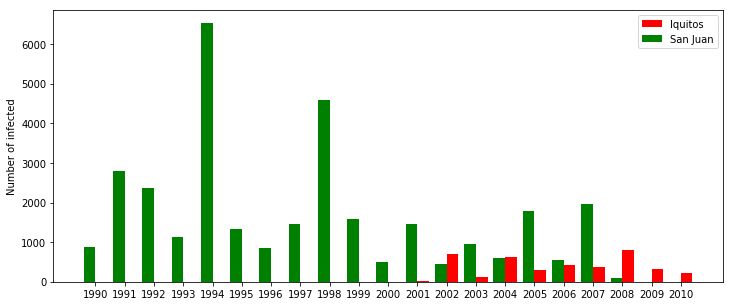

In [10]:
cases_by_year_sj = train_data[train_data['city'] == 'sj'][['year','total_cases']].groupby(by=['year']).sum()
cases_by_year_iq = train_data[train_data['city'] == 'iq'][['year','total_cases']].groupby(by=['year']).sum()
plt.figure(figsize=(12,5))
w=0.4
plt.bar(cases_by_year_iq.index.values+w, width=w, height=cases_by_year_iq['total_cases'], align='center', color='red')
plt.bar(cases_by_year_sj.index.values, width=w, height=cases_by_year_sj['total_cases'], align='center', color='green')
plt.legend(labels=['Iquitos', 'San Juan'])
plt.ylabel('Number of infected')
years = np.array(range(1990, 2011))
plt.xticks(years+w/2, years)
plt.show()

### NDVI
* *"Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1)"*
* It appears to make sense to imput missing NDVI values with the previous ones, because it shouldn't change much over week.

In [11]:
%autoreload
from utils.ContinuityImputer import ContinuityImputer

imputer = ContinuityImputer(attributes=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'])
train_data = imputer.fit_transform(train_data)

#### San Juan

In [14]:
ndvi_sj = train_data[train_data['city'] == 'sj'][['year', 'weekofyear','ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]

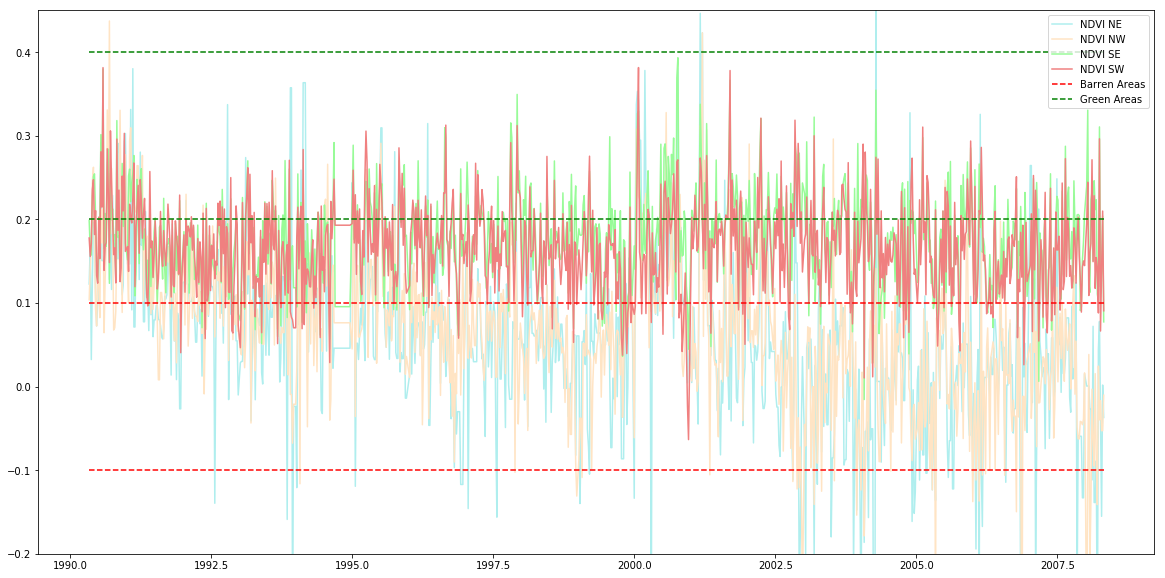

In [15]:
# 52 is the number of weeks per year
x = ndvi_sj['year'] + (ndvi_sj['weekofyear'] / 53.0)
ne = ndvi_sj['ndvi_ne']
nw = ndvi_sj['ndvi_nw']
se = ndvi_sj['ndvi_se']
sw = ndvi_sj['ndvi_sw']
plt.figure(figsize=(20,10))
plt.ylim(-0.2, 0.45)
plt.plot(x, ne, color='paleturquoise')
plt.plot(x, nw, color='bisque')
plt.plot(x, se, color='palegreen')
plt.plot(x, sw, color='lightcoral')
plt.hlines(-0.1, xmin=x[0], xmax=x.iloc[-1], linestyles='dashed', colors='red', zorder=4)
plt.hlines(0.2, xmin=x[0], xmax=x.iloc[-1], linestyles='dashed', colors='green', zorder=4)
plt.hlines(0.1, xmin=x[0], xmax=x.iloc[-1], linestyles='dashed', colors='red', zorder=4)
plt.hlines(0.4, xmin=x[0], xmax=x.iloc[-1], linestyles='dashed', colors='green', zorder=4)
labels=['NDVI NE', 'NDVI NW', 'NDVI SE', 'NDVI SW', 'Barren Areas', 'Green Areas']
plt.legend(labels=labels)
plt.show()

#### Iquitos

In [16]:
ndvi_iq = train_data[train_data['city'] == 'iq'][['year', 'weekofyear','ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]

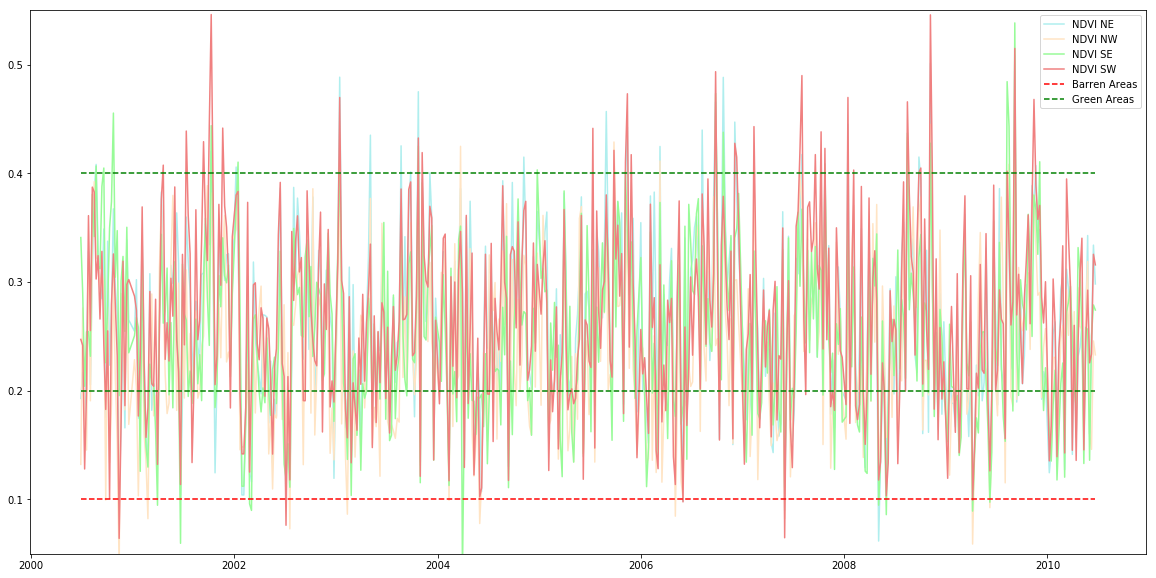

In [17]:
# 52 is the number of weeks per year
x = ndvi_iq['year'] + (ndvi_iq['weekofyear'] / 53.0)
ne = ndvi_iq['ndvi_ne']
nw = ndvi_iq['ndvi_nw']
se = ndvi_iq['ndvi_se']
sw = ndvi_iq['ndvi_sw']
plt.figure(figsize=(20,10))
plt.ylim(0.05, 0.55)
plt.plot(x, ne, color='paleturquoise')
plt.plot(x, nw, color='bisque')
plt.plot(x, se, color='palegreen')
plt.plot(x, sw, color='lightcoral')
plt.hlines(-0.1, xmin=x.iloc[0], xmax=x.iloc[-1], linestyles='dashed', colors='red', zorder=4)
plt.hlines(0.2, xmin=x.iloc[0], xmax=x.iloc[-1], linestyles='dashed', colors='green', zorder=4)
plt.hlines(0.1, xmin=x.iloc[0], xmax=x.iloc[-1], linestyles='dashed', colors='red', zorder=4)
plt.hlines(0.4, xmin=x.iloc[0], xmax=x.iloc[-1], linestyles='dashed', colors='green', zorder=4)
labels=['NDVI NE', 'NDVI NW', 'NDVI SE', 'NDVI SW', 'Barren Areas', 'Green Areas']
plt.legend(labels=labels)
plt.show()

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
ndvi_pca = pca.fit_transform(train_data[train_data['city'] == 'sj'][['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']])
pca.explained_variance_ratio_

array([0.62673783])